In [1]:
#For first timers, run the following lines
#import nltk
#nltk.download() and then select the vader_lexicon package from the window

# OR use below
#nltk.download('vader_lexicon')

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [2]:
news_tables = {}

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['amzn','goog','aapl','tsla']

for ticker in tickers:
    url = finviz_url + ticker + '&p=d'
    req = Request(url, headers={'user-agent':'my-app'})
    req = urlopen(req)
    soup = BeautifulSoup(req, 'html')
    news = soup.find(id='news-table')
    news_tables[ticker] = news

In [3]:
parsed_data = []

for ticker, news in news_tables.items():
    for row in news.findAll('tr'):
        if row.a is not None:
            title = row.a.text
            date_data = row.td.text.split(' ')
            
            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])

In [4]:
#If need to view the data:    
#print(parsed_data)

In [5]:
#If need to check the data structure
#amzn_data = news_tables['amzn']
#amzn_rows = amzn_data.findAll('tr')
#for index, row in enumerate(amzn_rows):
#    if row.a is not None:
#        timestamp = row.td.text
#        title = row.a.text
#        print(timestamp + " " + title)
#        print('----')

In [6]:
df = pd.DataFrame(parsed_data, columns=['ticker','date','time','title'])
df

,ticker,date,time,title
0,amzn,Dec-15-22,07:35PM,Amazon Pressed on Warehouse-Rebuilding Plan Af...
1,amzn,Dec-15-22,04:14PM,Amazon goes TikTok. Here's how it will work.
2,amzn,Dec-15-22,03:54PM,Amazon reportedly reaches agreement with the E...
3,amzn,Dec-15-22,02:40PM,Why More Shoppers Are Turning to Reddit for Ho...
4,amzn,Dec-15-22,01:30PM,Here's Why I End Up Overspending at Target -- ...
...,...,...,...,...
395,tsla,Dec-14-22,10:00AM,Redwood Materials to Build Second Battery-Part...
396,tsla,Dec-14-22,09:52AM,Tesla stock has fallen 28% since Elon Musk too...
397,tsla,Dec-14-22,09:38AM,Avatar Sequel Helps Imax Bulls Make the Case T...
398,tsla,Dec-14-22,09:25AM,Musk Loses Crown as Worlds Richest Person. Its...


In [7]:
df.to_csv('crawl_data.csv')  

In [8]:
vader = SentimentIntensityAnalyzer()

#If need to try how this method works
#vader.polarity_scores('I am a nice person')

In [9]:
df['comp_score'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df

,ticker,date,time,title,comp_score
0,amzn,Dec-15-22,07:35PM,Amazon Pressed on Warehouse-Rebuilding Plan Af...,0.1779
1,amzn,Dec-15-22,04:14PM,Amazon goes TikTok. Here's how it will work.,0.1779
2,amzn,Dec-15-22,03:54PM,Amazon reportedly reaches agreement with the E...,0.6249
3,amzn,Dec-15-22,02:40PM,Why More Shoppers Are Turning to Reddit for Ho...,0.6808
4,amzn,Dec-15-22,01:30PM,Here's Why I End Up Overspending at Target -- ...,0.0000
...,...,...,...,...,...
395,tsla,Dec-14-22,10:00AM,Redwood Materials to Build Second Battery-Part...,0.0000
396,tsla,Dec-14-22,09:52AM,Tesla stock has fallen 28% since Elon Musk too...,-0.3612
397,tsla,Dec-14-22,09:38AM,Avatar Sequel Helps Imax Bulls Make the Case T...,0.7220
398,tsla,Dec-14-22,09:25AM,Musk Loses Crown as Worlds Richest Person. Its...,0.2732


In [10]:
df['date'] = pd.to_datetime(df.date).dt.date

In [11]:
plt.figure(figsize=(10, 8))
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df

comp_score
ticker date                  
aapl   2022-12-09    0.149214
       2022-12-10    0.095100
       2022-12-11    0.189600
       2022-12-12    0.102638
       2022-12-13    0.096385
       2022-12-14    0.063110
       2022-12-15    0.040692
amzn   2022-12-11    0.282112
       2022-12-12    0.091257
       2022-12-13    0.305959
       2022-12-14    0.160757
       2022-12-15    0.094542
goog   2022-12-08    0.076372
       2022-12-09    0.133128
       2022-12-10    0.244367
       2022-12-11    0.254675
       2022-12-12    0.064879
       2022-12-13    0.165344
       2022-12-14   -0.008864
       2022-12-15   -0.017036
tsla   2022-12-14    0.105283
       2022-12-15    0.039531

<Figure size 1000x800 with 0 Axes>

In [12]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('comp_score', axis="columns").transpose()
mean_df

ticker,aapl,amzn,goog,tsla
date,,,,
2022-12-08,NaN,NaN,0.076372,NaN
2022-12-09,0.149214,NaN,0.133128,NaN
2022-12-10,0.095100,NaN,0.244367,NaN
2022-12-11,0.189600,0.282112,0.254675,NaN
2022-12-12,0.102638,0.091257,0.064879,NaN
2022-12-13,0.096385,0.305959,0.165344,NaN
2022-12-14,0.063110,0.160757,-0.008864,0.105283
2022-12-15,0.040692,0.094542,-0.017036,0.039531


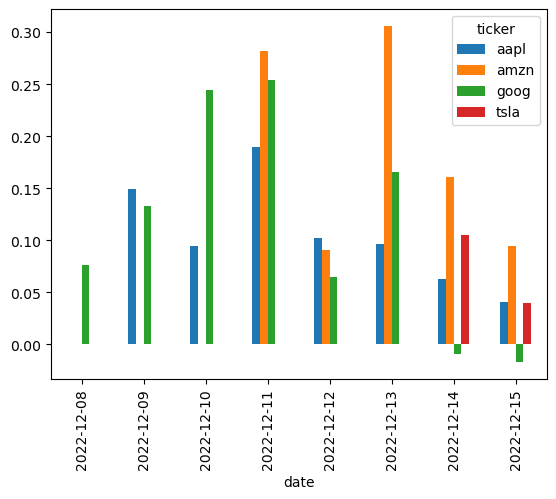

In [13]:
mean_df.plot(kind='bar')
plt.show()